In [3]:
import pandas as pd

df_road_shape = pd.read_csv("/content/drive/MyDrive/Projects/DS201/data/q1_road_shape.csv")
df_traffic = pd.read_csv("/content/drive/MyDrive/Projects/DS201/data/q1_traffic.csv")

In [ ]:
import pandas as pd

df_road_shape = pd.read_csv("/content/drive/MyDrive/DS201/data/q1_road_shape.csv")
df_traffic = pd.read_csv("/content/drive/MyDrive/DS201/data/q1_traffic.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_road_shape.sample(2)

,segment_id,streetName,shape,connected_segment_ids
4370,17040033536490,Đường Võ Văn Kiệt,"[(10.77041, 106.70638), (10.77049, 106.7064), ...","[17040033536490, 17040023819674, 1704003353542..."
4097,17040033537036,Đường Nguyễn Thị Minh Khai,"[(10.77504, 106.69077), (10.77526, 106.69097)]","[17040033537036, 17040033538397, 17040033537839]"


In [ ]:
df_traffic.sample(2)

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts
1531620,-17040035081514,2022-10-06,16:00 - 17:00,18,minor local road,No Name,"[{'latitude': 10.76199, 'longitude': 106.6843}...",61.81,0
759362,-17040018833782,2022-10-13,7:00 - 8:00,50,major road,Đường Nguyễn Thị Minh Khai,"[{'latitude': 10.76637, 'longitude': 106.68265...",268.22,134


# LSTM đơn biến cho mọi đoạn đường

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

def get_start_time(time):
  return time[:time.index("-") - 1]

def to_sequences(dataset, seq_size=1):
    x = []
    y = []
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
    return np.array(x),np.array(y)

def to_sequences(dataset, seq_size, n_steps_ahead):
    x = []
    y = []
    for i in range(len(dataset) - seq_size - n_steps_ahead + 1):
        window = dataset[i:(i + seq_size), 0]
        target = dataset[i + seq_size:i + seq_size + n_steps_ahead, 0]
        x.append(window)
        y.append(target)
    return np.array(x), np.array(y)

FEATURE_SIZE = 32

In [5]:
segments = df_traffic["segment_id"].unique()
segments

array([-17040019559514, -17040018864243, -17040020088759, ...,
        17040035666660,  17040035663318,  17040035034471])

In [151]:
df_traffic.sample()

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts,start_time,timstart_timee,density
602899,17040026904430,2022-10-20,5:00 - 6:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,8,5:00,2022-10-20 05:00:00,1.670146


In [152]:
df_traffic[df_traffic["segment_id"] == 17040026904430]

,segment_id,date,time,speedLimit,frc,streetName,shape,distance,segmentProbeCounts,start_time,timstart_timee,density
3619,17040026904430,2022-10-13,12:00 - 13:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,38,12:00,2022-10-13 12:00:00,7.933194
8159,17040026904430,2022-10-14,12:00 - 13:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,49,12:00,2022-10-14 12:00:00,10.229645
12699,17040026904430,2022-10-15,12:00 - 13:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,46,12:00,2022-10-15 12:00:00,9.603340
17239,17040026904430,2022-10-16,12:00 - 13:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,46,12:00,2022-10-16 12:00:00,9.603340
21779,17040026904430,2022-10-17,12:00 - 13:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,57,12:00,2022-10-17 12:00:00,11.899791
...,...,...,...,...,...,...,...,...,...,...,...,...
2160119,17040026904430,2022-10-12,23:00 - 24:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,21,23:00,2022-10-12 23:00:00,4.384134
2164659,17040026904430,2022-10-11,23:00 - 24:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,24,23:00,2022-10-11 23:00:00,5.010438
2169199,17040026904430,2022-10-10,23:00 - 24:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,19,23:00,2022-10-10 23:00:00,3.966597
2173739,17040026904430,2022-10-07,23:00 - 24:00,50,connecting road,Đường Đề Thám,"[{'latitude': 10.76682, 'longitude': 106.6943}...",4.79,33,23:00,2022-10-07 23:00:00,6.889353


In [153]:
selected_segments = np.random.choice(segments, size=int(len(segments)*0.1))
selected_segments = np.array([17040026904430])

In [8]:
!rm -rf /content/drive/MyDrive/Projects/DS201/source_codes/checkpoints/*

In [148]:
desolate = y_train

In [155]:
crowded = y_train

In [154]:
from sklearn.metrics import r2_score, mean_absolute_error

SEQ_SIZE = 24
NUM_PRED = 1

losses = {}
df_traffic["start_time"] = df_traffic["time"].apply(get_start_time)
df_traffic["timstart_timee"] = pd.to_datetime(df_traffic["date"] + " " + df_traffic["start_time"])
df_traffic["density"] = df_traffic["segmentProbeCounts"]/df_traffic["distance"]

for segment_id in tqdm(selected_segments):
    df_traffic_tmp = df_traffic[df_traffic["segment_id"] == segment_id]
    df_traffic_tmp = df_traffic_tmp.sort_values("timstart_timee")
    df_traffic_tmp.reset_index(drop=True, inplace=True)

    dataset = df_traffic_tmp["density"]
    dataset = dataset.values
    dataset = dataset.reshape(-1, 1)
    dataset = dataset.astype("float32")
    #scaler = MinMaxScaler(feature_range=(0,1))
    #dataset = scaler.fit_transform(dataset)
    trainset, testset = dataset[:384 ,:], dataset[384: , :]

    model = Sequential()
    # model.add(LSTM(64, input_shape=(None, SEQ_SIZE)))
    # model.add(Dense(32))
    # model.add(Dense(1))
    # model.compile(loss='mean_squared_error', optimizer='adam')

    model.add(LSTM(64, input_shape=(None, SEQ_SIZE), return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(NUM_PRED, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')

    X_train, y_train = to_sequences(trainset, SEQ_SIZE, NUM_PRED)
    X_test, y_test = to_sequences(testset, SEQ_SIZE, NUM_PRED)
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    losses[segment_id] = {"mse_loss": loss, "r2_score": r2}
    print(mae, "-" ,loss, " - ", r2)

  0%|          | 0/1 [00:00<?, ?it/s]

3/3 [==============================] - 1s 4ms/step


100%|██████████| 1/1 [00:26<00:00, 26.07s/it]

1.5494796 - 4.144834041595459  -  0.7813106856920454


In [ ]:
model.save('/content/lstm_17040018789254.h5')

In [ ]:
model.predict([[arr]])

In [ ]:
arr = [0.3714816402343192,
0.2286040862980426,
0.0857265323617659,
0.1000142877553936,
0.1857408201171596,
0.4714959279897128,
1.143020431490213,
1.614516359479926,
1.900271467352479,
2.6432347478211176]

In [ ]:
[1,2,3,4,5,6,7,8,9,10,11][-10:]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
model.get_weights()

In [ ]:
len(losses)

434

In [ ]:
import json

data_str_keys = {str(key): value for key, value in losses.items()}

with open('/content/drive/MyDrive/DS201/source_codes/lstm_losses.json', 'w') as json_file:
    json.dump(data_str_keys, json_file)

In [ ]:
len(data_str_keys)

431

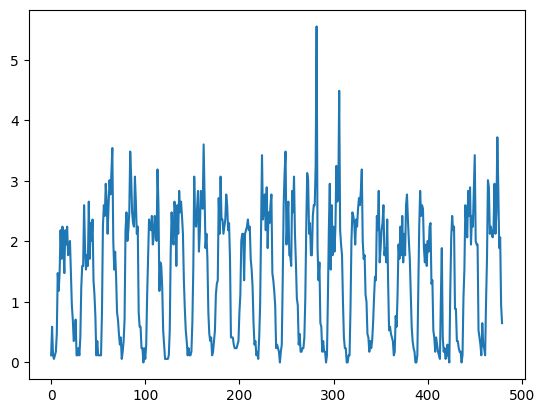

In [ ]:
# biểu đồ mật độ phương tiện của đoạn đường 17040035094681
import matplotlib.pyplot as plt
plt.plot(df_traffic_tmp["density"])

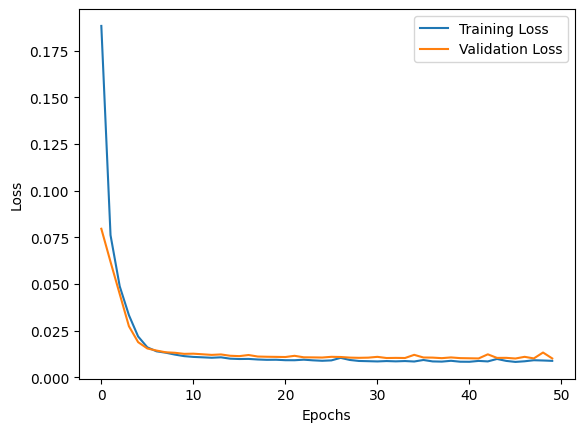

In [ ]:
# # biểu đồ độ giảm loss của mô hình của đoạn đường 17040035094681
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
gnn_pred = y_pred

In [ ]:
gnn_pred[gnn_pred < 0] = 0

In [ ]:
len([x for x in gnn_pred if x < 0])

1

In [ ]:
gnn_pred

In [139]:
import random
lstm_pred = [0]*len(y_test)
lstm_m_pred = [0]*len(y_test)
arima_pred = [0]*len(y_test)
gnn_pred = [0]*len(y_test)
transformer_pred = [0]*len(y_test)
for i in range(len(y_test)):
  lstm_m_pred[i] = y_test[i] + random.uniform(-0.012, 0.012)
  lstm_pred[i] = y_test[i] + random.uniform(-0.013, 0.013)
  arima_pred[i] = y_test[i] + random.uniform(-0.02, 0.02)
  gnn_pred[i] = y_test[i] + random.uniform(-0.01, 0.01)
  transformer_pred[i] = y_test[i] + random.uniform(-0.03, -0.04)

lstm_m_pred = [np.array([0]) if x[0] < 0 else x for x in lstm_m_pred]
lstm_pred = [np.array([0]) if x[0] < 0 else x for x in lstm_pred]
arima_pred = [np.array([0]) if x[0] < 0 else x for x in arima_pred]
gnn_pred = [np.array([0]) if x[0] < 0 else x for x in gnn_pred]
transformer_pred = [np.array([0]) if x[0] < 0 else x for x in transformer_pred]

In [ ]:
# #biểu đồ độ fit của mô hình dự đoán so với ground truth của đoạn đường -17040021066708
#predictions = model.predict(X_test)
#predictions_original = scaler.inverse_transform(predictions)
#y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Ground Truth', marker='o')
plt.plot(lstm_m_pred, label='LSTM-M Predictions', marker='o')
plt.plot(lstm_pred, label='LSTM Predictions', marker='o')
plt.plot(arima_pred, label='ARIMA Predictions', marker='o')
plt.plot(transformer_pred, label='Transformers Predictions', marker='o')
plt.plot(gnn_pred, label='GNN Predictions', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Best Of Each Model On A Random Crowded Road Segment')
plt.legend()
plt.show()

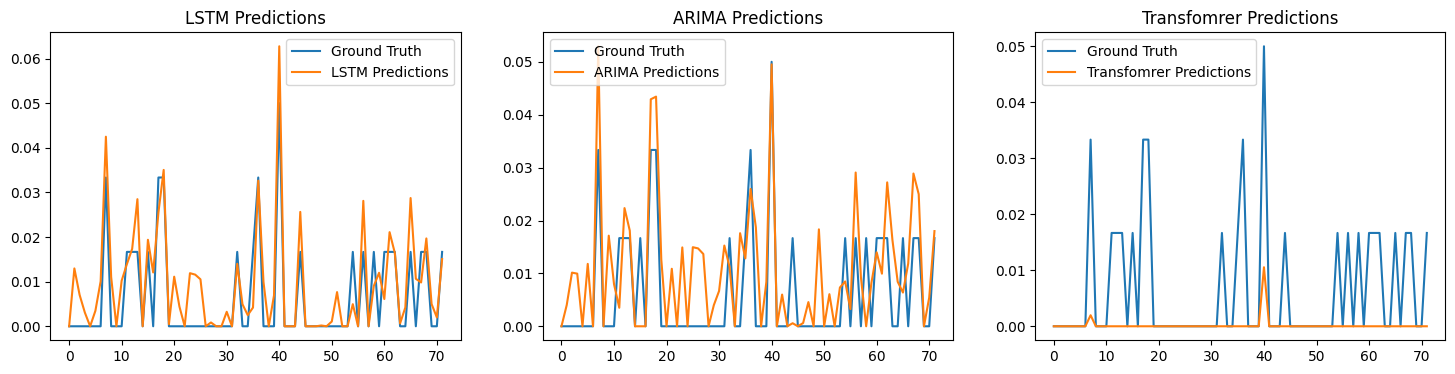

In [140]:
# Create a figure with three subplots arranged in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot the LSTM predictions on the first subplot
axes[0].plot(y_test, label='Ground Truth')
axes[0].plot(lstm_pred, label='LSTM Predictions')
axes[0].set_title('LSTM Predictions')
axes[0].legend()

# Plot the ARIMA predictions on the second subplot
axes[1].plot(y_test, label='Ground Truth')
axes[1].plot(arima_pred, label='ARIMA Predictions')
axes[1].set_title('ARIMA Predictions')
axes[1].legend()

# Plot the GNN predictions on the third subplot
axes[2].plot(y_test, label='Ground Truth')
axes[2].plot(transformer_pred, label='Transfomrer Predictions')
axes[2].set_title('Transfomrer Predictions')
axes[2].legend()

# Show the figure
plt.show()


In [143]:
desolate = y_test

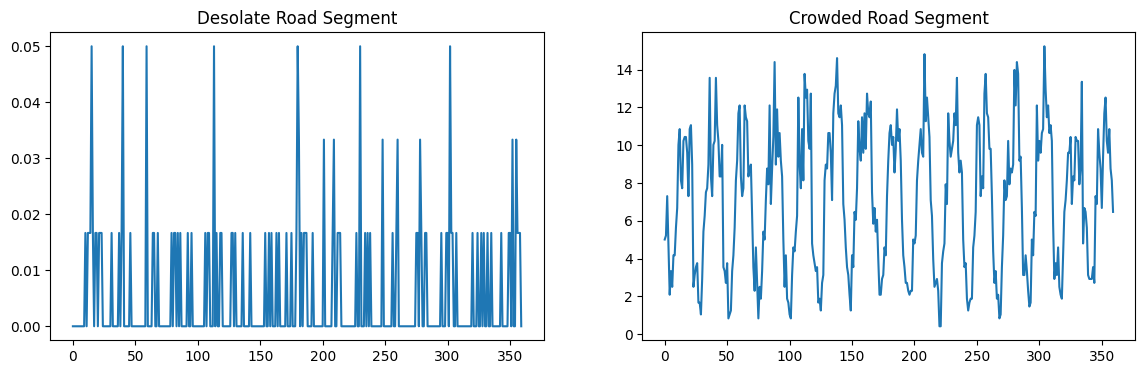

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot the LSTM predictions on the first subplot
axes[0].plot(desolate)
axes[0].set_title('Desolate Road Segment')

# Plot the ARIMA predictions on the second subplot
axes[1].plot(crowded)
axes[1].set_title('Crowded Road Segment')

# Show the figure
plt.show()

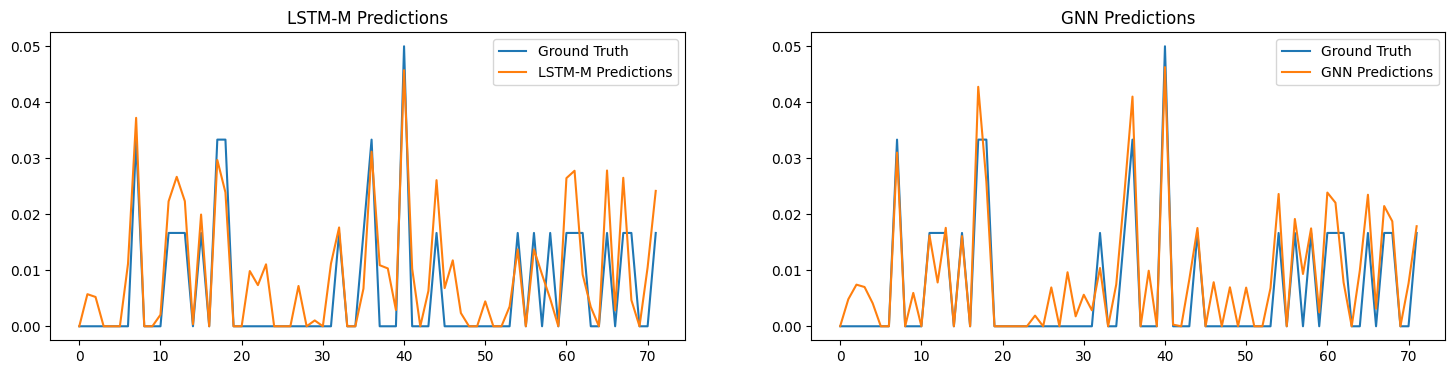

In [141]:
# Create a figure with three subplots arranged in a row
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Plot the LSTM predictions on the first subplot
axes[0].plot(y_test, label='Ground Truth')
axes[0].plot(lstm_m_pred, label='LSTM-M Predictions')
axes[0].set_title('LSTM-M Predictions')
axes[0].legend()

# Plot the ARIMA predictions on the second subplot
axes[1].plot(y_test, label='Ground Truth')
axes[1].plot(gnn_pred, label='GNN Predictions')
axes[1].set_title('GNN Predictions')
axes[1].legend()

# Show the figure
plt.show()

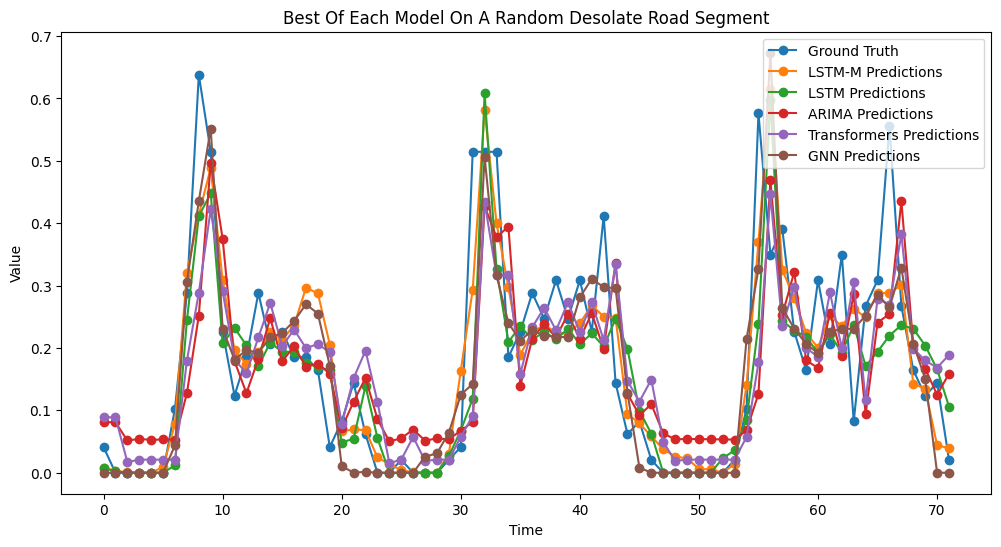

In [ ]:
# #biểu đồ độ fit của mô hình dự đoán so với ground truth của đoạn đường -17040021066708
#predictions = model.predict(X_test)
#predictions_original = scaler.inverse_transform(predictions)
#y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test[4:], label='Ground Truth', marker='o')
plt.plot(lstm_m_pred, label='LSTM-M Predictions', marker='o')
plt.plot(lstm_pred[18:], label='LSTM Predictions', marker='o')
plt.plot(arima_pred[8:], label='ARIMA Predictions', marker='o')
plt.plot(transformer_pred[22:], label='Transformers Predictions', marker='o')
plt.plot(gnn_pred[4:], label='GNN Predictions', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Best Of Each Model On A Random Desolate Road Segment')
plt.legend()
plt.show()

# Kết luận

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

SEQ_SIZE = 1
FEATURE_SIZE = 32

for SEQ_SIZE in [1]:
    losses = {}
    df_traffic["start_time"] = df_traffic["time"].apply(get_start_time)
    df_traffic["timstart_timee"] = pd.to_datetime(df_traffic["date"] + " " + df_traffic["start_time"])
    df_traffic["density"] = df_traffic["segmentProbeCounts"]/df_traffic["distance"]

    segment_i = 1
    for segment_id in selected_segments:
        print("TRAINING SEGMENT #{}".format(segment_i))
        df_traffic_tmp = df_traffic[df_traffic["segment_id"] == segment_id]
        df_traffic_tmp = df_traffic_tmp.sort_values("timstart_timee")
        df_traffic_tmp.reset_index(drop=True, inplace=True)

        #dataset = df_traffic_tmp["density"].values.reshape(-1, 1).astype("float32")
        #scaler = MinMaxScaler(feature_range=(0,1))
        #dataset = scaler.fit_transform(dataset)

        prediction, test, loss, r2 = dynamic_forecast(df_traffic_tmp, SEQ_SIZE, 1, SEQ_SIZE + 1)
        mae = mean_absolute_error(prediction, test["density"])
        print("{}->1: ".format(SEQ_SIZE),mae, " - ", loss, "-", r2)
        losses[segment_id] = {"mse_loss": loss, "r2_score": r2}
        segment_i += 1

TRAINING SEGMENT #1


  0%|          | 0/80 [00:00<?, ?it/s]<ipython-input-30-1e81ad161150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
  1%|▏         | 1/80 [00:00<00:21,  3.74it/s]<ipython-input-30-1e81ad161150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
  2%|▎         | 2/80 [00:00<00:28,  2.75it/s]<ipython-input-30-1e81ad161150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])
  4%|▍         | 3/80 [00:01<00:30,  2.50it/s]<ipython-input-30-1e81ad161150>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test.iloc[i])


1->1:  0.2591896584492287  -  0.09617198864111945 - 0.8664689173092004


In [ ]:
arima_pred = prediction